# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read from dataset

In [2]:
#creating a dataframe by importing from csv
leads_df = pd.read_csv('leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# shape of dataframe
# 9240 rows and 37 columns
leads_df.shape

(9240, 37)

In [4]:
#structure of dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# checking the stats of the numerical columns
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data preparation

In [6]:
#drop all columns which have only 1 unique value in the column - this column has no variance
#Check Columns with only 1 unique value and drop them
col= leads_df.loc[:,leads_df.apply(pd.Series.nunique) == 1]
leads_df = leads_df.loc[:,leads_df.apply(pd.Series.nunique) != 1]
leads_df.shape

(9240, 32)

In [7]:
#check to see if Lead# is duplicated - it should be unique
sum(leads_df.duplicated(subset='Lead Number'))

0

In [8]:
#check to see if Prospect ID# is duplicated - it should be unique
sum(leads_df.duplicated(subset='Prospect ID'))

0

In [9]:
#Dropping these columns as they are unique and add no value
leads_df = leads_df.drop(['Lead Number','Prospect ID'], axis=1)

In [10]:
# a lot of columns have a Select value which needs to be converted to nan values since the values arent provided
#converting select values to nan values
leads_df = leads_df.replace('Select', np.nan)

In [11]:
#checking missing values
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [12]:
#checking missing %age of values
round(leads_df.isnull().sum()*100/len(leads_df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
#checking all columns which are > 70% of missing values and dropping them
columns = leads_df.columns
for i in columns:
    if (round(leads_df[i].isnull().sum()*100/len(leads_df.index),2) > 70):
        leads_df.drop(i,inplace=True,axis=1)

In [14]:
#shape of dataframe after dropping them - 9 columns dropped
leads_df.shape

(9240, 28)

In [15]:
#again checking missing values
round(leads_df.isnull().sum()*100/len(leads_df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [16]:
#structure of the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531

## Missing values imputation

### Country

In [17]:
#checking the categorical column 'Country'
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
Italy                      2
Ghana                      2
Bangladesh                 2
Belgium                    2
Philippines                2
Netherlands                2
Uganda                     2
China                      2
Asia/Pacific Region        2
Tanzania                   1
Indonesia                  1
Sri Lanka                  1
Vietnam                    1
Liberia                    1
Denmark       

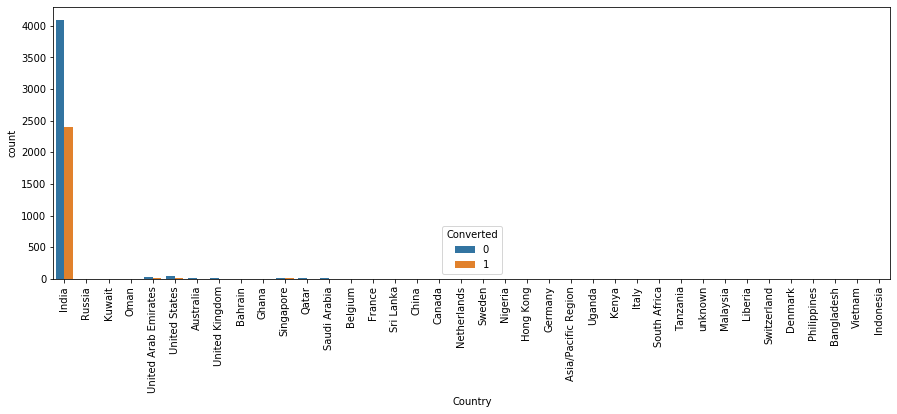

In [18]:
#plotting countplot dividing them into converted and non-converted categories
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df.Country, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [19]:
# imputing nan values into India since they have the max frequency
leads_df['Country'] = leads_df['Country'].replace(np.nan,'India')

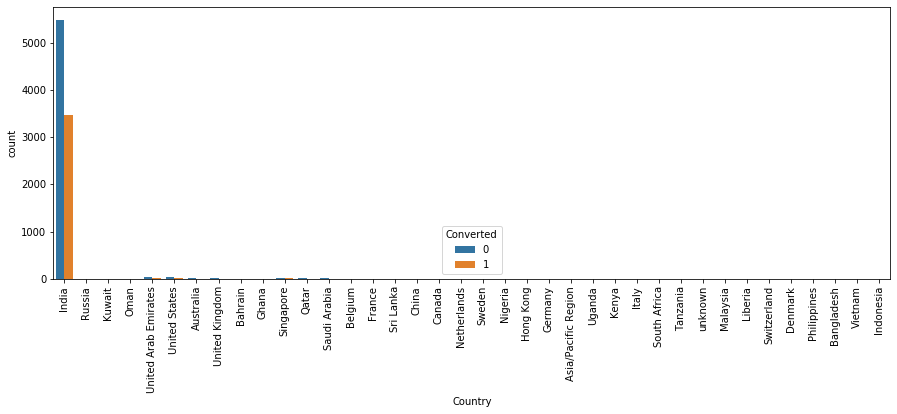

In [20]:
#verifying India values increased in countplot since all nan values imputed with India
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df.Country, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### City

In [21]:
#checking the categorical column 'City'
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
#converting nan values to Mumbai since they have max freq
leads_df['City'] = leads_df['City'].replace(np.nan,'Mumbai')

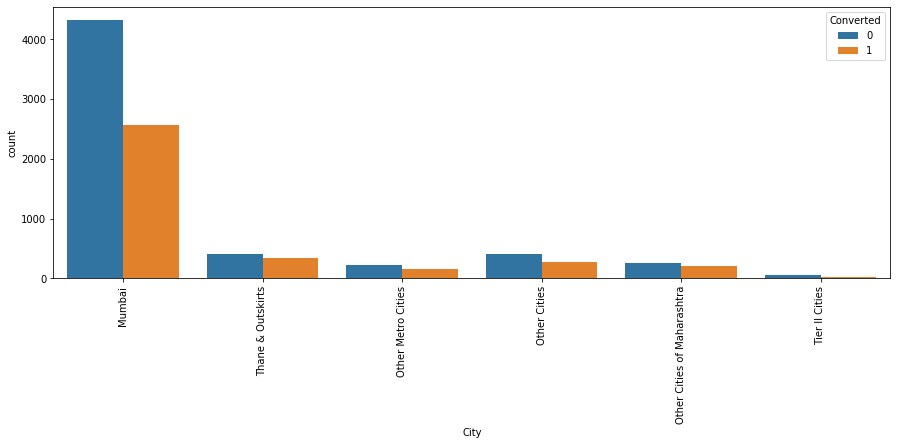

In [23]:
#nan values should have gone to Mumbai bucket
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df.City, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Specialization

In [24]:
#checking the categorical column 'Specialization'
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [25]:
# Converting nan values to non-specified since there is no category with biggest frequency
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan,'Not Specified')

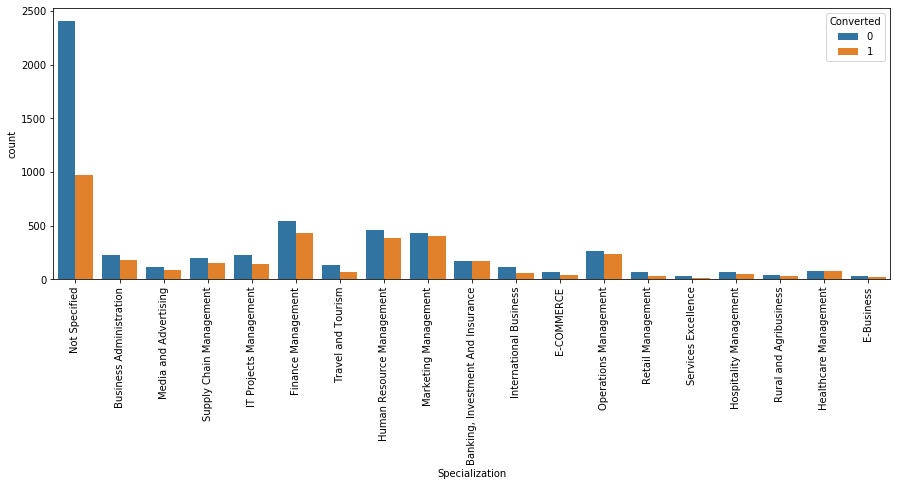

In [26]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [27]:
# clubbing all mgmt into Misc mgmt
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Misc') 

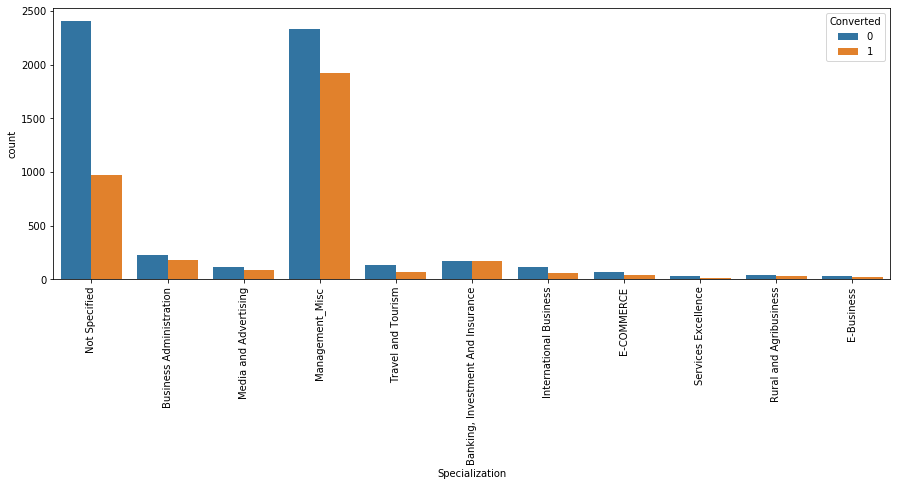

In [28]:
#plotting them into countplot
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### What is your current occupation

In [29]:
#checking counts in this column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#converting nan values to Unemployed - highest frequency
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [31]:
#check for counts again
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

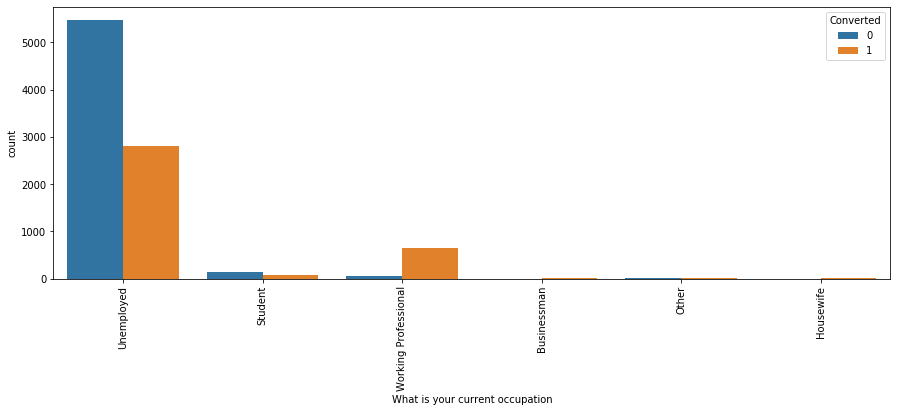

In [32]:
#plotting in seaborn
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df['What is your current occupation'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### What matters most to you in choosing a course

In [33]:
# checking counts in the column
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
# replace nan with mode
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

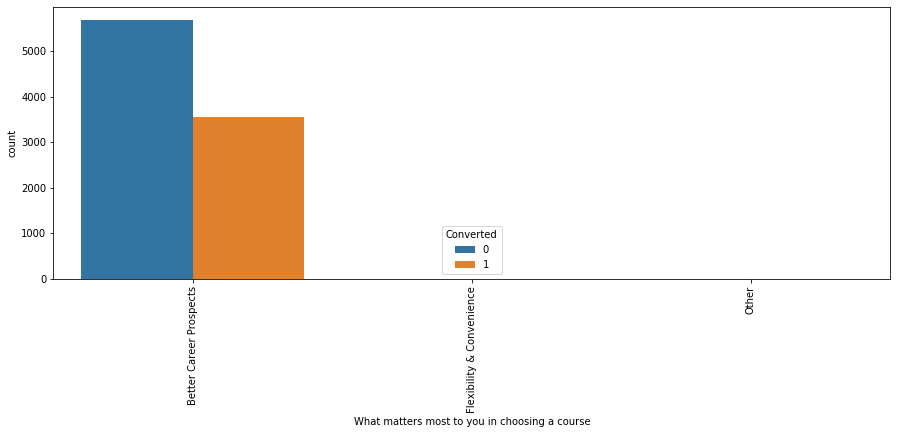

In [35]:
#plotting them in seaborn
# Since this column has less data to showcase - we can go ahead and drop it later
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_df['What matters most to you in choosing a course'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Tags

In [36]:
#checking counts in the tags columns
leads_df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
# replacing with mode
leads_df['Tags'] = leads_df['Tags'].replace(np.nan,'Will revert after reading the email')

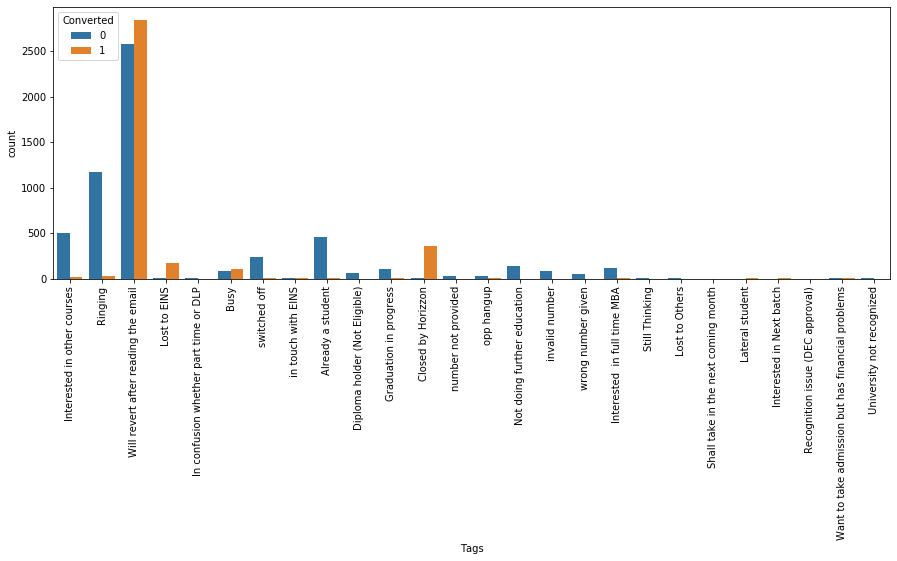

In [38]:
#plotting in seaborn
plt.figure(figsize=(15,5))
s1 = sns.countplot(leads_df['Tags'], hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [39]:
#Converting all tags with less frequeny into Other tags
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Misc_Tags')

In [40]:
#checking value counts again in Tags column
leads_df['Tags'].value_counts(dropna=False)

Will revert after reading the email    5425
Misc_Tags                              1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [41]:
#missing value check again
#imputation worked - now only the below are remaining
round(leads_df.isnull().sum()*100/len(leads_df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Lead Source

In [42]:
#checking counts in lead source columns
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
welearnblog_Home        1
blog                    1
NC_EDM                  1
youtubechannel          1
Name: Lead Source, dtype: int64

In [43]:
# Converting nan to Google which is the mode
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Others')
# Correcting spelling issues
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
# Facebook and social media are the same
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
# Converting the below also into Social Media
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Social Media')        

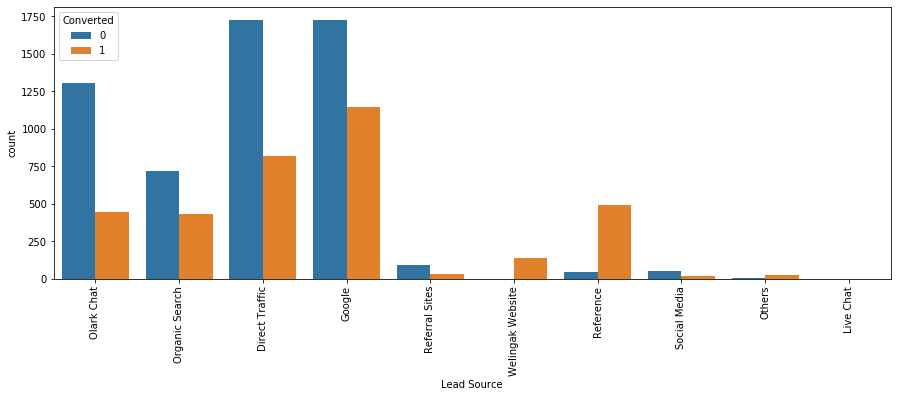

In [44]:
#plotting them in seaborn
plt.figure(figsize=(15,5))
s1 = sns.countplot(leads_df['Lead Source'], hue = leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Last Activity

In [45]:
#checking counts in Last Activity column
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
# replacing nan with Email Opened - mode
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email opened')
# Clubbing them into Misc category
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Misc')
# spelling mistakes
leads_df['Last Activity'] = leads_df['Last Activity'].replace('Email opened','Email Opened')

In [47]:
#checking counts 
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Misc                          205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [48]:
#check missing values
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Total visits

In [49]:
#checking counts 
leads_df['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [50]:
leads_df['TotalVisits'] = leads_df['TotalVisits'].replace(np.nan,0.0)

In [51]:
#checking counts again
leads_df['TotalVisits'].value_counts(dropna=False)

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

### Page Views Per Visit

In [52]:
leads_df['Page Views Per Visit'].value_counts(dropna=False)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
         ... 
6.71        1
1.86        1
3.29        1
2.13        1
3.82        1
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
1.63        1
2.29        1
3.38        1
2.08        1
1.54        1
2.90        1
3.43        1
1.31        1
8.50        1
11.50       1
14.50       1
2.38        1
1.48        1
3.57        1
2.86        1
1.45        1
1.64        1
1.21        1
2.14        1
3.83        1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [53]:
leads_df['Page Views Per Visit'] = leads_df['Page Views Per Visit'].replace(np.nan,0.0)

In [54]:
#check missing values again
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

### Lead Origin /Do Not Call/Do not Email

In [55]:
#checking counts
leads_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

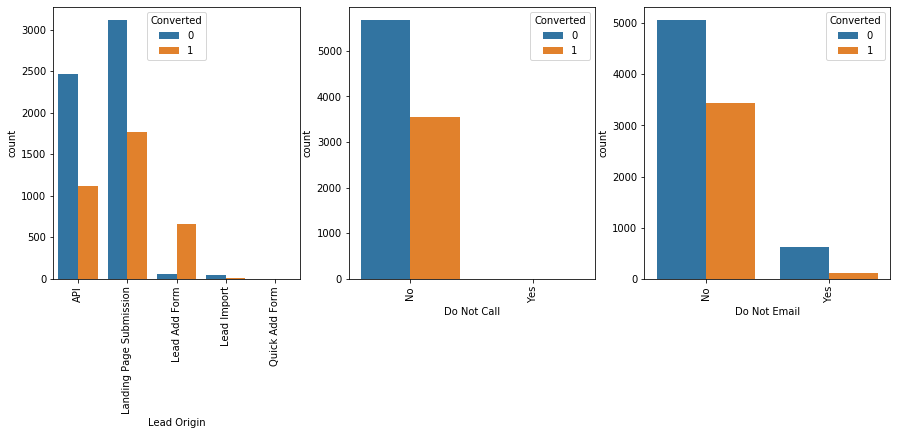

In [56]:
#plotting in seaborn
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 3, 1)
ax1=sns.countplot(leads_df['Lead Origin'], hue=leads_df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2=plt.subplot(1, 3, 2)
ax2=sns.countplot(leads_df['Do Not Call'], hue=leads_df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
ax3=plt.subplot(1, 3, 3)
ax3=sns.countplot(leads_df['Do Not Email'], hue=leads_df.Converted)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
plt.show()

In [57]:
#checking counts 
leads_df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [58]:
#checking counts
leads_df['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [59]:
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [60]:
#Need to drop columns which have huge data imbalance
columns_to_drop = []
columns_to_drop.append('Do Not Call')
columns_to_drop.append('Country')
columns_to_drop.append('What matters most to you in choosing a course')

In [61]:
columns_to_drop

['Do Not Call', 'Country', 'What matters most to you in choosing a course']

### Search to be dropped

In [62]:
#checking counts
leads_df.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

### Newspaper to be dropped

In [63]:
#checking counts
leads_df.Newspaper.value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

### Newspaper Article to be dropped

In [64]:
#checking counts
leads_df['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

### X education Forums to be dropped

In [65]:
##checking counts
leads_df['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

### Through Recommendations to be dropped

In [66]:
#checking counts
leads_df['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

### A free copy of Mastering The Interview not to be dropped

In [67]:
#checking counts
leads_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### Digital Advertisement

In [68]:
leads_df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [69]:
columns_to_drop.extend(['Search','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations'])

In [70]:
#final list of columns to drop
columns_to_drop

['Do Not Call',
 'Country',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

### Last notable activity

In [71]:
# checking counts
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [72]:
#replacing the low frequency items to Misc
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Misc')

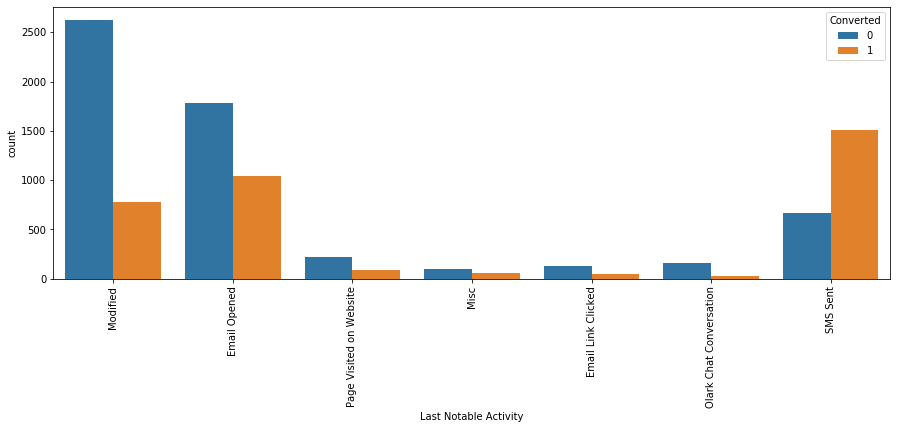

In [73]:
#plotting on seaborn
plt.figure(figsize=(15,5))
s1 = sns.countplot(leads_df['Last Notable Activity'],hue=leads_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [74]:
leads_df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Misc                        160
Name: Last Notable Activity, dtype: int64

In [75]:
#DROP THE COLUMNS
leads_df = leads_df.drop(columns_to_drop,axis=1)

In [76]:
#structure of dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Tags                                      9240 non-null object
Lead Quality                              4473 non-null object
City                                      9240 non-null object
Asymmetrique Activity Index               5022 non-null object
Asymmetriqu

### Lead Quality

In [77]:
#checking counts
leads_df['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [78]:
#replacing with mode
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan,'Might be')

In [79]:
#Rechecking counts
leads_df['Lead Quality'].value_counts(dropna=False)

Might be             6327
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

### Asymmetrique Profile Score

In [80]:
#checking counts
leads_df['Asymmetrique Profile Score'].value_counts(dropna=False)

NaN     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [81]:
#replacing with mode
leads_df['Asymmetrique Profile Score'] = leads_df['Asymmetrique Profile Score'].replace(np.nan,15.0)

In [82]:
#checking counts
leads_df['Asymmetrique Profile Score'].value_counts(dropna=False)

15.0    5977
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [83]:
#checking missing %age of values
round(leads_df.isnull().sum()*100/len(leads_df.index),2)

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Tags                                       0.00
Lead Quality                               0.00
City                                       0.00
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score                 0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### Asymmetrique Activity Index

In [84]:
leads_df['Asymmetrique Activity Index'].value_counts(dropna=False)

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [85]:
leads_df['Asymmetrique Activity Index'] = leads_df['Asymmetrique Activity Index'].replace(np.nan,'02.Medium')

In [86]:
#checking missing %age of values
round(leads_df.isnull().sum()*100/len(leads_df.index),2)

Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                             0.00
What is your current occupation            0.00
Tags                                       0.00
Lead Quality                               0.00
City                                       0.00
Asymmetrique Activity Index                0.00
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score                 0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

### Asymmetrique Profile Index

In [87]:
#checking counts
leads_df['Asymmetrique Profile Index'].value_counts(dropna=False)

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [88]:
#replace with mode
leads_df['Asymmetrique Profile Index'] = leads_df['Asymmetrique Profile Index'].replace(np.nan,'02.Medium')

### Asymmetrique Activity Score

In [89]:
#checking counts
leads_df['Asymmetrique Activity Score'].value_counts(dropna=False)

NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [90]:
#replace with mode
leads_df['Asymmetrique Activity Score'] = leads_df['Asymmetrique Activity Score'].replace(np.nan,14.0)

In [91]:
#checking counts again
leads_df['Asymmetrique Activity Score'].value_counts(dropna=False)

14.0    5989
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [92]:
#checking missing %age of values
round(leads_df.isnull().sum()*100/len(leads_df.index),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
City                                      0.0
Asymmetrique Activity Index               0.0
Asymmetrique Profile Index                0.0
Asymmetrique Activity Score               0.0
Asymmetrique Profile Score                0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [93]:
#checking the %age of converted column
Converted = sum(leads_df.Converted)*100/len(leads_df.index)

In [94]:
#find the imbalance
Converted

38.53896103896104

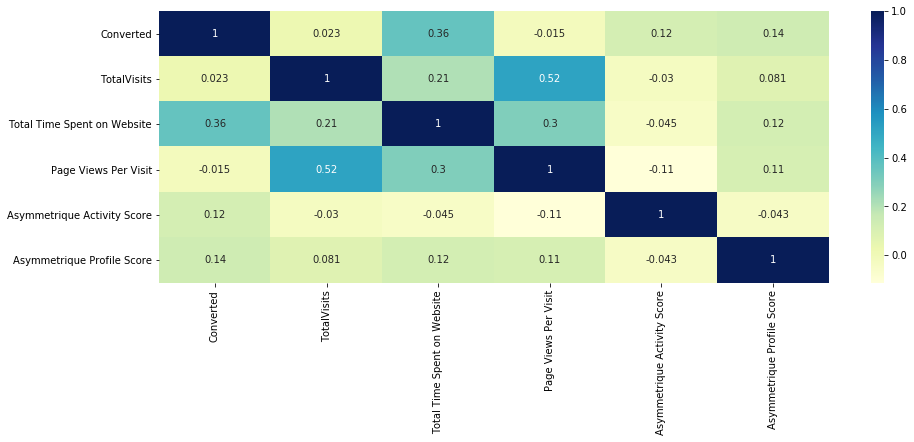

In [95]:
#checking correlation between numerical columns
plt.figure(figsize=(15,5))
sns.heatmap(leads_df.corr(),cmap='YlGnBu',annot=True)

In [96]:
#structure of columns
leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787,14.166450,15.730952
std,0.486714,4.836682,548.021466,2.164258,1.033585,1.493977
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,0.000000,12.000000,0.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,15.000000
75%,1.000000,5.000000,936.000000,3.000000,14.000000,16.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


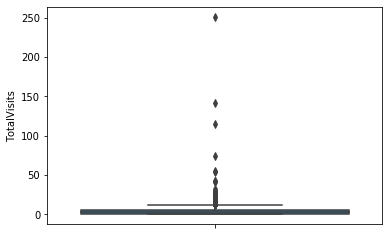

In [97]:
#checking outliers in numerical columns
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [98]:
#check the quantiles of this variable
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

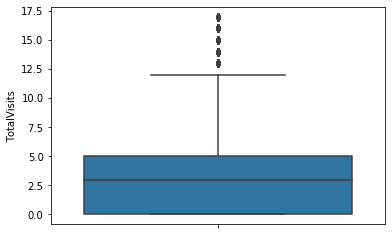

In [99]:
#outlier treatment using IQR
Q3 = leads_df.TotalVisits.quantile(0.99)
leads_out = leads_df[(leads_df.TotalVisits <= Q3)]
Q1 = leads_df.TotalVisits.quantile(0.01)
leads_out = leads_out[(leads_out.TotalVisits >= Q1)]
sns.boxplot(y=leads_out['TotalVisits'])
plt.show()

In [100]:
#check shape
leads_out.shape

(9157, 19)

In [101]:
#check quantiles
leads_out['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
95%      1559.400000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

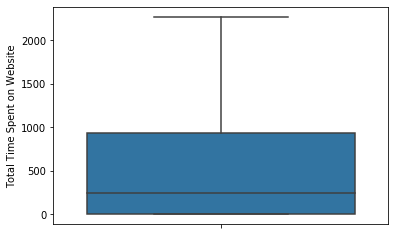

In [102]:
#check boxplot after outlier treatment
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_out['Total Time Spent on Website'])
plt.show()

In [103]:
#checking quantiles of column
leads_out['Page Views Per Visit'].describe()

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

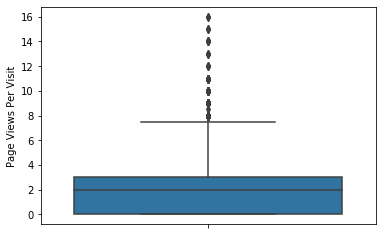

In [104]:
#boxplot showing outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=leads_out['Page Views Per Visit'])
plt.show()

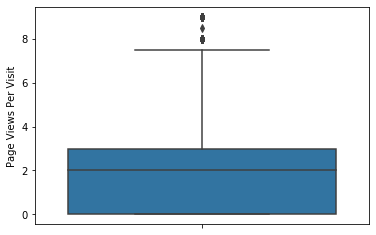

In [105]:
#outlier treatment
Q3 = leads_out['Page Views Per Visit'].quantile(0.99)
leads_out = leads_out[leads_out['Page Views Per Visit'] <= Q3]
Q1 = leads_out['Page Views Per Visit'].quantile(0.01)
leads_out = leads_out[leads_out['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_out['Page Views Per Visit'])
plt.show()

In [106]:
#checking the rows and columns
leads_out.shape

(9090, 19)

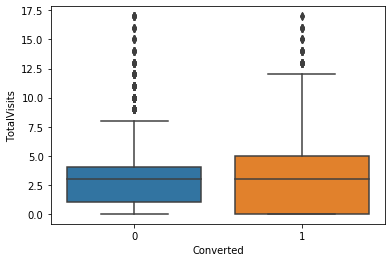

In [107]:
#checking the %age of counts converted or non-converted for Total Visits
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_out)
plt.show()

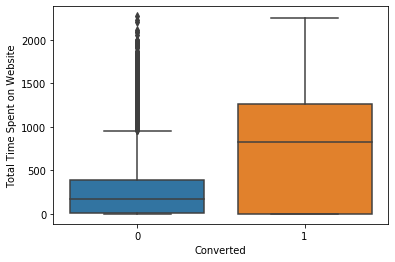

In [108]:
#checking the %age of counts converted or non-converted for Total Time spent on Website
sns.boxplot(x=leads_out.Converted, y=leads_out['Total Time Spent on Website'])
plt.show()

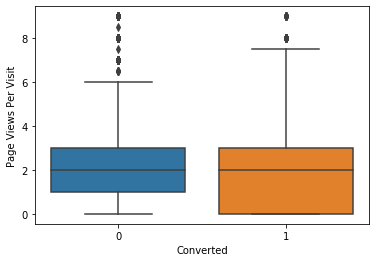

In [109]:
#checking the %age of counts converted or non-converted for Page views per visits
sns.boxplot(x=leads_out.Converted,y=leads_out['Page Views Per Visit'])
plt.show()

In [110]:
#checking categorical columns
cat_cols= leads_out.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [111]:
#Binary encoding
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_out[varlist] = leads_out[varlist].apply(binary_map)

In [112]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads_out[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads_out = pd.concat([leads_out,dummy],1)

In [113]:
#sample rows
leads_out.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Misc,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [114]:
#dummies for specialization
dummy = pd.get_dummies(leads_out['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)

In [115]:
#dummies for below parameter
dummy = pd.get_dummies(leads_out['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)
dummy = pd.get_dummies(leads_out['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Misc'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)
dummy = pd.get_dummies(leads_out['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Misc'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)
dummy = pd.get_dummies(leads_out['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Misc_Tags'], 1)
leads_out = pd.concat([leads_out, dummy], axis = 1)

In [116]:
#rows and columns
leads_out.shape

(9090, 72)

In [117]:
#dropping original categorical columns
leads_out.drop(cat_cols,1,inplace = True)

In [118]:
#rows and columns
leads_out.shape

(9090, 59)

# Modelling

## Train and Test Split

In [119]:
#target variable Y 
from sklearn.model_selection import train_test_split
y = leads_out['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [120]:
# independent variables
X = leads_out.drop('Converted',axis=1)

In [121]:
#sample values
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,15.0,15.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,1532,2.0,14.0,20.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,13.0,17.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2.0,1428,1.0,15.0,18.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [122]:
#splitting into train and test data for both X and y
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [123]:
#sample data in X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6363 entries, 302 to 5730
Data columns (total 58 columns):
TotalVisits                                             6363 non-null float64
Total Time Spent on Website                             6363 non-null int64
Page Views Per Visit                                    6363 non-null float64
Asymmetrique Activity Score                             6363 non-null float64
Asymmetrique Profile Score                              6363 non-null float64
Lead Origin_Landing Page Submission                     6363 non-null uint8
Lead Origin_Lead Add Form                               6363 non-null uint8
Lead Origin_Lead Import                                 6363 non-null uint8
Lead Origin_Quick Add Form                              6363 non-null uint8
What is your current occupation_Housewife               6363 non-null uint8
What is your current occupation_Other                   6363 non-null uint8
What is your current occupation_Student        

# Scaling of the training dataset

In [124]:
#Run scaling on numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_columns = X_train.select_dtypes(include=['float64','int64']).columns

In [125]:
num_columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [126]:
X_train[num_columns].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000
mean,3.107496,483.710042,2.218447,14.146472,15.714757
std,2.903901,545.157389,1.882508,1.026794,1.470943
min,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,11.000000,0.000000,14.000000,15.000000
50%,3.000000,246.000000,2.000000,14.000000,15.000000
75%,5.000000,929.000000,3.000000,14.000000,16.000000
max,17.000000,2272.000000,9.000000,18.000000,20.000000


In [127]:
#Run scaling now:
X_train[num_columns]=scaler.fit_transform(X_train[num_columns])

In [128]:
X_train[num_columns].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
302,1.340545,-0.428736,0.059262,-0.142661,-1.845735
6087,-1.070195,-0.887355,-1.178546,-0.142661,-0.485956
1033,0.651762,-0.025151,1.477695,-1.116643,-0.485956
7656,0.996153,-0.241619,2.008943,0.831321,1.553713
3241,0.307371,0.897591,-0.471986,-0.142661,-0.485956


In [129]:
#sample values
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email
302,1.340545,-0.428736,0.059262,-0.142661,-1.845735,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6087,-1.070195,-0.887355,-1.178546,-0.142661,-0.485956,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1033,0.651762,-0.025151,1.477695,-1.116643,-0.485956,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7656,0.996153,-0.241619,2.008943,0.831321,1.553713,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3241,0.307371,0.897591,-0.471986,-0.142661,-0.485956,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Run Logisitic Regression

In [130]:
#Importing libraries and running logistic regression
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1538.5
Date:                Mon, 07 Oct 2019   Deviance:                       3077.0
Time:                        13:18:02   Pearson chi2:                 1.23e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3017      2.832     -0.460      0.646      -6.853       4.249
TotalVisits                                              0.1497      0.070      2.146      0.032       0.013       0.286
Total Time Spent on Website                              1.1223      0.056     20.110      0.000       1.013       1.232
Page Views Per Visit                                    -0.1445      0.077     -1.866      0.062      -0.296       0.007
Asymmetrique Activity Score                              0.6161      0.060     10.350      0.000       0.499       0.733
Asymmetrique Profile Score                               0.3781      0.058      6.520      0.000       0.264       0.492
Lead Origin_Landing Page Submission                     -1.5524      0.200     -7.772      0.000      -1.944      -1.161
Lead Origin_Lead Add Form                                1.6692      2.377      0.702      0.482      -2.989       6.327
Lead Origin_Lead Import                                  0.8423      1.034      0.815      0.415      -1.184       2.868
Lead Origin_Quick Add Form                              19.1200   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
What is your current occupation_Housewife               21.4748   1.28e+04      0.002      0.999   -2.51e+04    2.52e+04
What is your current occupation_Other                    1.7639      1.840      0.959      0.338      -1.842       5.370
What is your current occupation_Student                  0.5223      1.554      0.336      0.737      -2.524       3.568
What is your current occupation_Unemployed              -0.9658      1.493     -0.647      0.518      -3.892       1.960
What is your current occupation_Working Professional     1.7089      1.516      1.127      0.260      -1.263       4.681
City_Other Cities                                        0.5672      0.195      2.913      0.004       0.186       0.949
City_Other Cities of Maharashtra                         0.3444      0.213      1.614      0.107      -0.074       0.763
City_Other Metro Cities                                  0.2553      0.258      0.988      0.323      -0.251       0.762
City_Thane & Outskirts                                   0.4554      0.178      2.564      0.010       0.107       0.804
City_Tier II Cities                                      0.6532      0.553      1.181      0.238      -0.431       1.737
Specialization_Banking, Investment And Insurance         1.3135      0.303      4.342      0.000       0.721       1.906
Specialization_Business Administration                   1.2669      0.282      4.496      0.000       0.715       1.819
Specialization_E-Business                                0

In [131]:
#Running RFE for 15 variables from 58 variables
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train,y_train)

In [132]:
#checking all the variables from rfe operation
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True])

In [133]:
#checking the variables, their support variables and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('Asymmetrique Activity Score', False, 17),
 ('Asymmetrique Profile Score', False, 29),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 41),
 ('What is your current occupation_Housewife', False, 18),
 ('What is your current occupation_Other', False, 30),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', False, 16),
 ('City_Other Cities', False, 27),
 ('City_Other Cities of Maharashtra', False, 31),
 ('City_Other Metro Cities', False, 34),
 ('City_Thane & Outskirts', False, 26),
 ('City_Tier II Cities', False, 25),
 ('Specialization_Banking, Investment And Insurance', False, 3),
 ('Specialization_Business Administration', False, 7),
 ('

In [134]:
#putting all positive support columns in cols variable
cols = X_train.columns[rfe.support_]

In [135]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_E-COMMERCE', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [136]:
#checking all variables which have no importance in logistic regression
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_International Business',
       'Specialization_Management_Misc',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google

In [137]:
#Running logistic regression for these columns
logm2 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1723.1
Date:                Mon, 07 Oct 2019   Deviance:                       3446.2
Time:                        13:18:05   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6924      0.293     -5.778      0.000      -2.266      -1.118
Total Time Spent on Website                       1.0445      0.046     22.837      0.000       0.955       1.134
Lead Origin_Lead Add Form                         3.1502      0.255     12.331      0.000       2.649       3.651
What is your current occupation_Student          -1.5128      0.428     -3.536      0.000      -2.351      -0.674
What is your current occupation_Unemployed       -2.8055      0.239    -11.739      0.000      -3.274      -2.337
Specialization_E-COMMERCE                         0.3512      0.373      0.942      0.346      -0.379       1.082
Lead Source_Welingak Website                      2.2993      1.049      2.192      0.028       0.243       4.355
Last Activity_Email Bounced                      -2.0938      0.406     -5.154      0.000      -2.890      -1.298
Last Notable Activity_Modified                   -1.0114      0.103     -9.785      0.000      -1.214      -0.809
Last Notable Activity_Olark Chat Conversation    -1.6908      0.360     -4.703      0.000      -2.395      -0.986
Last Notable Activity_SMS Sent                    2.1806      0.120     18.204      0.000       1.946       2.415
Tags_Busy                                         3.4170      0.301     11.368      0.000       2.828       4.006
Tags_Closed by Horizzon                           8.8356      0.758     11.664      0.000       7.351      10.320
Tags_Lost to EINS                                 9.2891      0.774     12.002      0.000       7.772      10.806
Tags_Ringing                                     -0.6264      0.298     -2.101      0.036      -1.211      -0.042
Tags_Will revert after reading the email          4.0551      0.210     19.355      0.000       3.644       4.466
=================================================================================================================
"""

In [138]:
#dropping Specialization_E-COMMERCE column and rerunning logistic regression
cols = cols.drop('Specialization_E-COMMERCE',1)

In [139]:
#running logistic regression
logm3 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1723.5
Date:                Mon, 07 Oct 2019   Deviance:                       3447.1
Time:                        13:18:05   Pearson chi2:                 1.06e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.6858      0.293     -5.760      0.000      -2.259      -1.112
Total Time Spent on Website                       1.0441      0.046     22.831      0.000       0.954       1.134
Lead Origin_Lead Add Form                         3.1433      0.255     12.318      0.000       2.643       3.643
What is your current occupation_Student          -1.5195      0.428     -3.554      0.000      -2.357      -0.681
What is your current occupation_Unemployed       -2.8074      0.239    -11.752      0.000      -3.276      -2.339
Lead Source_Welingak Website                      2.3002      1.049      2.193      0.028       0.244       4.356
Last Activity_Email Bounced                      -2.0834      0.405     -5.147      0.000      -2.877      -1.290
Last Notable Activity_Modified                   -1.0110      0.103     -9.783      0.000      -1.214      -0.808
Last Notable Activity_Olark Chat Conversation    -1.6907      0.360     -4.701      0.000      -2.396      -0.986
Last Notable Activity_SMS Sent                    2.1818      0.120     18.217      0.000       1.947       2.417
Tags_Busy                                         3.4119      0.301     11.352      0.000       2.823       4.001
Tags_Closed by Horizzon                           8.8363      0.757     11.667      0.000       7.352      10.321
Tags_Lost to EINS                                 9.2961      0.773     12.020      0.000       7.780      10.812
Tags_Ringing                                     -0.6181      0.298     -2.075      0.038      -1.202      -0.034
Tags_Will revert after reading the email          4.0546      0.210     19.350      0.000       3.644       4.465
=================================================================================================================
"""

In [140]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,4.65
13,Tags_Will revert after reading the email,3.19
6,Last Notable Activity_Modified,1.98
1,Lead Origin_Lead Add Form,1.65
8,Last Notable Activity_SMS Sent,1.63
12,Tags_Ringing,1.59
10,Tags_Closed by Horizzon,1.35
4,Lead Source_Welingak Website,1.28
9,Tags_Busy,1.12
0,Total Time Spent on Website,1.11


In [141]:
#Dropping columns based on VIF
cols = cols.drop('What is your current occupation_Unemployed',1)

In [142]:
#Running logistic Regression again
logm4 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1826.3
Date:                Mon, 07 Oct 2019   Deviance:                       3652.6
Time:                        13:18:05   Pearson chi2:                 1.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.3189      0.210    -20.529      0.000      -4.731      -3.907
Total Time Spent on Website                       1.0741      0.045     23.976      0.000       0.986       1.162
Lead Origin_Lead Add Form                         3.4257      0.250     13.723      0.000       2.936       3.915
What is your current occupation_Student           1.0930      0.368      2.971      0.003       0.372       1.814
Lead Source_Welingak Website                      1.8667      1.048      1.781      0.075      -0.187       3.921
Last Activity_Email Bounced                      -2.1089      0.395     -5.344      0.000      -2.882      -1.335
Last Notable Activity_Modified                   -1.0001      0.099    -10.066      0.000      -1.195      -0.805
Last Notable Activity_Olark Chat Conversation    -1.7968      0.352     -5.100      0.000      -2.487      -1.106
Last Notable Activity_SMS Sent                    2.1806      0.117     18.674      0.000       1.952       2.409
Tags_Busy                                         3.2241      0.299     10.797      0.000       2.639       3.809
Tags_Closed by Horizzon                           8.9245      0.757     11.791      0.000       7.441      10.408
Tags_Lost to EINS                                 9.1689      0.772     11.881      0.000       7.656      10.681
Tags_Ringing                                     -0.8362      0.297     -2.812      0.005      -1.419      -0.253
Tags_Will revert after reading the email          4.0533      0.208     19.532      0.000       3.647       4.460
=================================================================================================================
"""

In [143]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_Will revert after reading the email,1.81
1,Lead Origin_Lead Add Form,1.62
5,Last Notable Activity_Modified,1.58
7,Last Notable Activity_SMS Sent,1.56
9,Tags_Closed by Horizzon,1.29
3,Lead Source_Welingak Website,1.27
11,Tags_Ringing,1.14
0,Total Time Spent on Website,1.10
4,Last Activity_Email Bounced,1.08
10,Tags_Lost to EINS,1.06


In [144]:
#Dropping column based on p-value
cols = cols.drop('Lead Source_Welingak Website',1)

In [145]:
#Running logistic Regression again
logm5 = sm.GLM(y_train,sm.add_constant(X_train[cols]),family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1828.9
Date:                Mon, 07 Oct 2019   Deviance:                       3657.9
Time:                        13:18:05   Pearson chi2:                 1.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.3255      0.211    -20.538      0.000      -4.738      -3.913
Total Time Spent on Website                       1.0748      0.045     23.975      0.000       0.987       1.163
Lead Origin_Lead Add Form                         3.6457      0.236     15.429      0.000       3.183       4.109
What is your current occupation_Student           1.0837      0.370      2.933      0.003       0.359       1.808
Last Activity_Email Bounced                      -2.0848      0.389     -5.355      0.000      -2.848      -1.322
Last Notable Activity_Modified                   -1.0045      0.099    -10.124      0.000      -1.199      -0.810
Last Notable Activity_Olark Chat Conversation    -1.8001      0.352     -5.108      0.000      -2.491      -1.109
Last Notable Activity_SMS Sent                    2.1786      0.117     18.654      0.000       1.950       2.407
Tags_Busy                                         3.2300      0.299     10.809      0.000       2.644       3.816
Tags_Closed by Horizzon                           8.9257      0.757     11.792      0.000       7.442      10.409
Tags_Lost to EINS                                 9.1778      0.771     11.901      0.000       7.666      10.689
Tags_Ringing                                     -0.8611      0.299     -2.884      0.004      -1.446      -0.276
Tags_Will revert after reading the email          4.0632      0.208     19.560      0.000       3.656       4.470
=================================================================================================================
"""

In [146]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.81
4,Last Notable Activity_Modified,1.58
6,Last Notable Activity_SMS Sent,1.56
1,Lead Origin_Lead Add Form,1.33
8,Tags_Closed by Horizzon,1.28
10,Tags_Ringing,1.14
0,Total Time Spent on Website,1.10
3,Last Activity_Email Bounced,1.08
9,Tags_Lost to EINS,1.06
5,Last Notable Activity_Olark Chat Conversation,1.05


In [147]:
#Predicting y-values based on final model 
y_train_pred = logm5.fit().predict(sm.add_constant(X_train[cols]))

In [148]:
#first 10 values
y_train_pred[:10]

302     0.326700
6087    0.013316
1033    0.428161
7656    0.036694
3241    0.946900
5738    0.240303
7366    0.005486
3680    0.124289
4170    0.942365
43      0.314674
dtype: float64

In [149]:
#reshaping the values to nd array
y_train_pred = y_train_pred.values.reshape(-1)

In [150]:
# predicted values
y_train_pred[:10]

array([0.32670003, 0.01331554, 0.42816053, 0.03669353, 0.94690011,
       0.24030252, 0.0054855 , 0.12428932, 0.94236492, 0.31467389])

In [151]:
#Creating a dataframe with actual values and converted probability values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted-Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID
0,0,0.326700,302
1,0,0.013316,6087
2,0,0.428161,1033
3,0,0.036694,7656
4,1,0.946900,3241


In [152]:
#Setting threshold to 0.5 where prob > 0.5; predicted == 1 and 0 < 0.5
y_train_pred_final['Predicted'] = y_train_pred_final['Converted-Prob'].map(lambda x:1 if x > 0.5 else 0)

In [153]:
#final dataframe
y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID,Predicted
0,0,0.326700,302,0
1,0,0.013316,6087,0
2,0,0.428161,1033,0
3,0,0.036694,7656,0
4,1,0.946900,3241,1


# Logistic Regression Metrics

In [154]:
#Creating confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final['Predicted'])

In [155]:
#print the confusion matrix
print(confusion)

[[3656  279]
 [ 410 2018]]


In [156]:
#accuracy score
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final['Predicted']))

0.8917177432028918


In [157]:
#Based on the confusion matrix: True positive; true negative; false positive and false negative
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [158]:
# What is the sensitivity?
sensitivity = TP/float(TP+FN)

In [159]:
#Print the sensitivity
sensitivity

0.8311367380560132

In [160]:
# What is the specificity?
specificity = TN/float(TN+FP)

In [161]:
#Print the specificity
specificity

0.9290978398983482

In [162]:
# What is false positive rate?
FPR = FP/float(TN+FP)

In [163]:
#Print false positive rate?
FPR

0.07090216010165185

In [164]:
# What is positive predictive value?
PPV = TP/float(TP+FP)

In [165]:
#Print the positive predictive value?
PPV

0.8785372224640836

In [166]:
#What is negative predictive value
NPV = TN/float(TN+FN)

In [167]:
#Print negative predictive value
NPV

0.8991637973438269

In [168]:
#Draw ROC curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [169]:
#Getting the False positive, true positive and thresholds
fpr,tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final['Converted-Prob'],drop_intermediate=False)

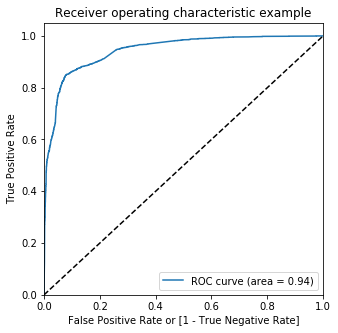

In [170]:
#ROC Curve
draw_roc(y_train_pred_final.Converted,y_train_pred_final['Converted-Prob'])

In [171]:
#To find the optimum value of threshold
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted-Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.326700,302,0,1,1,1,1,0,0,0,0,0,0
1,0,0.013316,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.428161,1033,0,1,1,1,1,1,0,0,0,0,0
3,0,0.036694,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.946900,3241,1,1,1,1,1,1,1,1,1,1,1


In [172]:
#Creating cutoff dataframe based on prob/acc/sensi/specif
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.758290  0.969110  0.628208
0.2   0.2  0.816124  0.948517  0.734435
0.3   0.3  0.860443  0.886326  0.844473
0.4   0.4  0.887632  0.859143  0.905210
0.5   0.5  0.891718  0.831137  0.929098
0.6   0.6  0.886060  0.793657  0.943075
0.7   0.7  0.871759  0.738468  0.954003
0.8   0.8  0.830740  0.597611  0.974587
0.9   0.9  0.801509  0.493410  0.991614


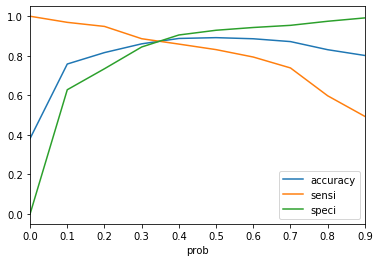

In [173]:
#Plotting the cutoff dataframe
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [174]:
#Setting the threshold to 0.35
y_train_pred_final['final_Predicted'] = y_train_pred_final['Converted-Prob'].map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted-Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.326700,302,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.013316,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.428161,1033,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.036694,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.946900,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [175]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted-Prob'].map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted-Prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted-Prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.326700,302,0,33
1,0,0.013316,6087,0,1
2,0,0.428161,1033,1,43
3,0,0.036694,7656,0,4
4,1,0.946900,3241,1,95


In [176]:
#Find the accuracy score
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_Predicted)

0.8778877887788779

In [177]:
#What is the confusion matrix?
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_Predicted)

In [178]:
confusion2

array([[3464,  471],
       [ 306, 2122]], dtype=int64)

In [179]:
#again finding the sensi,specifity,False positive rate and negative predicted value
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

sensitivity = TP/float(TP+FN)

sensitivity

0.8739703459637562

In [180]:
specificity = TN/float(TN+FP)

specificity

0.8803049555273189

In [181]:
FPR = FP/float(TN+FP)

FPR

0.11969504447268106

In [182]:
PPV = TP/float(TP+FP)

PPV

0.8183571153104512

In [183]:
NPV = TN/float(TN+FN)

NPV

0.9188328912466843

In [184]:
Precision = TP/float(TP+FP)

In [185]:
Precision

0.8183571153104512

In [186]:
Recall = TP/float(TP+FN)

In [187]:
Recall

0.8739703459637562

In [188]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8183571153104512

In [189]:
recall_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8739703459637562

In [190]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final['Converted-Prob'])

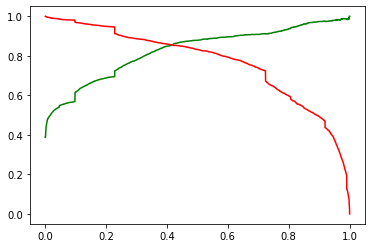

In [191]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [192]:
y_train_pred_final

,Converted,Converted-Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.326700,302,0,1,1,1,1,0,0,0,0,0,0,0,33
1,0,0.013316,6087,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.428161,1033,0,1,1,1,1,1,0,0,0,0,0,1,43
3,0,0.036694,7656,0,1,0,0,0,0,0,0,0,0,0,0,4
4,1,0.946900,3241,1,1,1,1,1,1,1,1,1,1,1,1,95
5,0,0.240303,5738,0,1,1,1,0,0,0,0,0,0,0,0,24
6,0,0.005486,7366,0,1,0,0,0,0,0,0,0,0,0,0,1
7,0,0.124289,3680,0,1,1,0,0,0,0,0,0,0,0,0,12
8,1,0.942365,4170,1,1,1,1,1,1,1,1,1,1,1,1,94
9,0,0.314674,43,0,1,1,1,1,0,0,0,0,0,0,0,31


In [198]:
y_train_pred_final = y_train_pred_final.sort_values(ascending=True,by='Lead_Score')

In [199]:
y_train_pred_final[:10]

,Converted,Converted-Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
5010,0,0.004155,3528,0,1,0,0,0,0,0,0,0,0,0,0,0
3971,0,0.002879,1185,0,1,0,0,0,0,0,0,0,0,0,0,0
3234,0,0.002420,2187,0,1,0,0,0,0,0,0,0,0,0,0,0
6089,0,0.003346,5811,0,1,0,0,0,0,0,0,0,0,0,0,0
3974,0,0.002681,1376,0,1,0,0,0,0,0,0,0,0,0,0,0
6087,0,0.001919,7704,0,1,0,0,0,0,0,0,0,0,0,0,0
4301,0,0.002734,3322,0,1,0,0,0,0,0,0,0,0,0,0,0
6084,0,0.001953,1227,0,1,0,0,0,0,0,0,0,0,0,0,0
3232,0,0.001008,5537,0,1,0,0,0,0,0,0,0,0,0,0,0
3230,0,0.003707,8919,0,1,0,0,0,0,0,0,0,0,0,0,0


In [200]:
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1828.9
Date:                Mon, 07 Oct 2019   Deviance:                       3657.9
Time:                        13:53:04   Pearson chi2:                 1.10e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.3255      0.211    -20.538      0.000      -4.738      -3.913
Total Time Spent on Website                       1.0748      0.045     23.975      0.000       0.987       1.163
Lead Origin_Lead Add Form                         3.6457      0.236     15.429      0.000       3.183       4.109
What is your current occupation_Student           1.0837      0.370      2.933      0.003       0.359       1.808
Last Activity_Email Bounced                      -2.0848      0.389     -5.355      0.000      -2.848      -1.322
Last Notable Activity_Modified                   -1.0045      0.099    -10.124      0.000      -1.199      -0.810
Last Notable Activity_Olark Chat Conversation    -1.8001      0.352     -5.108      0.000      -2.491      -1.109
Last Notable Activity_SMS Sent                    2.1786      0.117     18.654      0.000       1.950       2.407
Tags_Busy                                         3.2300      0.299     10.809      0.000       2.644       3.816
Tags_Closed by Horizzon                           8.9257      0.757     11.792      0.000       7.442      10.409
Tags_Lost to EINS                                 9.1778      0.771     11.901      0.000       7.666      10.689
Tags_Ringing                                     -0.8611      0.299     -2.884      0.004      -1.446      -0.276
Tags_Will revert after reading the email          4.0632      0.208     19.560      0.000       3.656       4.470
=================================================================================================================
"""